In [484]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [485]:
df = pd.read_excel("auto-mpg .xlsx")

In [486]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


### 1. Drop Origin column

In [487]:
df.drop(columns=['origin'], inplace=True)

### 2. Find missing values and replace them with most appropiate option

In [488]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [489]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN
21,24,4,107.0,90,2430,NaN,70.0,audi 100 ls,JH5673R
26,10,8,307.0,200,4376,15.0,70.0,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,datsun pl510,NaN
32,25,4,98.0,80,2046,19.0,71.0,ford pinto,NaN
45,18,6,258.0,110,2962,13.5,NaN,amc hornet sportabout (sw),GTHY79
52,30,4,88.0,76,2065,14.5,71.0,fiat 124b,NaN
53,31,4,71.0,65,1773,NaN,71.0,toyota corolla 1200,T568G4
54,35,4,72.0,69,1613,18.0,71.0,datsun 1200,NaN
56,26,4,91.0,70,1955,20.5,NaN,plymouth cricket,TY6764


In [490]:
r1 = rows_with_nulls.loc[21]

In [491]:
# Deciding what to replace the NaN values with

In model year column, replace the NaN values with 71 since if you look at the data, you see how that column is ordered (from the top) in descending order and the elements are between or really close to the 71s

In [492]:
df['model year'].fillna(71, inplace=True)

In [493]:
# fig, ax = plt.subplots(figsize=(10, 6))
# sb.boxplot(data=df['acceleration'])

In [494]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN
21,24,4,107.0,90,2430,NaN,70.0,audi 100 ls,JH5673R
26,10,8,307.0,200,4376,15.0,70.0,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,datsun pl510,NaN
32,25,4,98.0,80,2046,19.0,71.0,ford pinto,NaN
52,30,4,88.0,76,2065,14.5,71.0,fiat 124b,NaN
53,31,4,71.0,65,1773,NaN,71.0,toyota corolla 1200,T568G4
54,35,4,72.0,69,1613,18.0,71.0,datsun 1200,NaN
73,13,8,307.0,130,4098,14.0,72.0,chevrolet chevelle concours (sw),NaN


(array([ 5., 11., 18., 19., 21.,  7.,  6.,  6.,  2.,  1.]),
 array([ 8.  ,  9.55, 11.1 , 12.65, 14.2 , 15.75, 17.3 , 18.85, 20.4 ,
        21.95, 23.5 ]),
 <BarContainer object of 10 artists>)

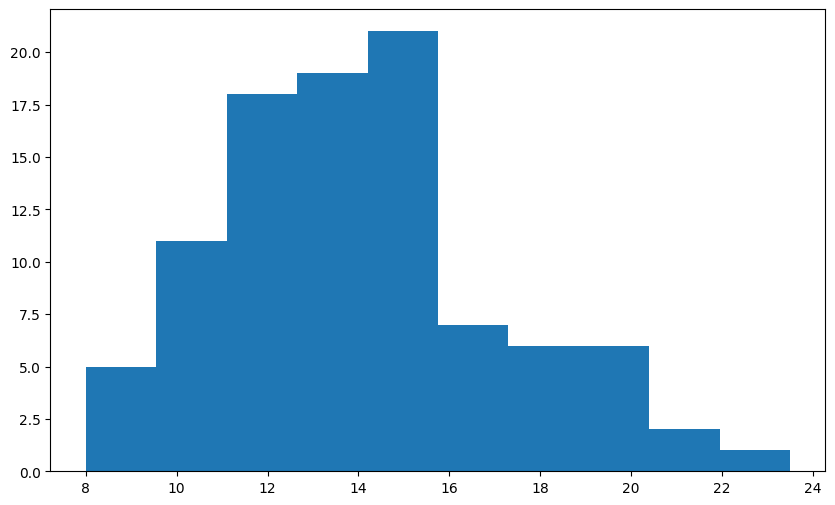

In [495]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df['acceleration'])

In [496]:
df['acceleration'].sort_values().median()

14.0

In [497]:
df['acceleration'].fillna(df['acceleration'].mean(), inplace=True)

In [498]:
import scipy

In [200]:
scipy.stats.normaltest(df['acceleration'], nan_policy='omit')

NormaltestResult(statistic=4.33614013482718, pvalue=0.11439818478645539)

### 3. Find and remove duplicate entries for the column ‘CAR Number'

I dont want to delete the multiple entries with NaN,
just the ones that are not null and are repeated


In [499]:
not_null_mask = df['CAR Number'].notnull() # = ~df['CAR Number'].isnull()
duplicated_mask = df.duplicated(subset='CAR Number', keep='first')

In [500]:
# Select entries where both masks are True
dup_entries = df[duplicated_mask & not_null_mask]
df.drop(index=dup_entries.index, inplace=True)

In [501]:
df.reset_index(inplace=True, drop=True)

In [502]:
# Now create the masks again to check if there are any duplicates:
not_null_mask = df['CAR Number'].notnull() # = ~df['CAR Number'].isnull()
duplicated_mask = df.duplicated(subset='CAR Number', keep='first')
df[duplicated_mask & not_null_mask] # Empty, there aren't any duplicates (excluding NaN)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number


### 4. Get Basic Insights

In [503]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [504]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
91,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
92,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
93,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
94,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67
95,18,6,225.0,105,3121,16.5,73.0,plymouth valiant,HUYT76


In [505]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96,89
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,89
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plymouth fury iii,L6V 043
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
mean,18.458333,6.302083,253.390625,130.885417,3338.916667,14.073893,71.270833,NaN,NaN
std,5.918600,1.881320,125.365932,48.047317,983.267321,2.990300,1.030883,NaN,NaN
min,9.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,14.000000,4.000000,119.000000,89.500000,2361.500000,12.000000,70.000000,NaN,NaN
50%,17.000000,8.000000,302.000000,133.500000,3434.500000,14.000000,71.000000,NaN,NaN
75%,23.250000,8.000000,350.250000,165.000000,4246.250000,15.500000,72.000000,NaN,NaN


In [506]:
max_val_idx = df['horsepower'].idxmax()
df.loc[max_val_idx, 'car name']

'pontiac catalina'

### 5. Change mpg to L/100km

In [507]:
df['mpg'] = 235.215/df['mpg']

In [508]:
df.rename(columns={'mpg': 'L/100km'}, inplace=True)

In [509]:
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,13.067500,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15.681000,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,13.067500,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,14.700938,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,13.836176,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


### 6. Normalize weight b/w 0 to 1

In [510]:
df['weight'] /= df['weight'].max()

### 7. Bin horsepower into three bins

In [511]:
bins = np.linspace(df['horsepower'].min(),
                   df['horsepower'].max(),
                   4)
labels = ['little horsepower', 'medium horsepower', 'high horsepower']
bins

array([ 46.        , 105.66666667, 165.33333333, 225.        ])

In [512]:
binned_hp = pd.cut(df['horsepower'], bins, labels=labels, include_lowest=True)

In [513]:
df['binned horsepower'] = binned_hp

In [514]:
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,binned horsepower
0,13.067500,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043,medium horsepower
1,15.681000,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079,medium horsepower
2,13.067500,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600,medium horsepower
3,14.700938,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000,medium horsepower
4,13.836176,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET,medium horsepower


(array([30.,  0.,  0.,  0.,  0., 23.,  0.,  0.,  0., 43.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

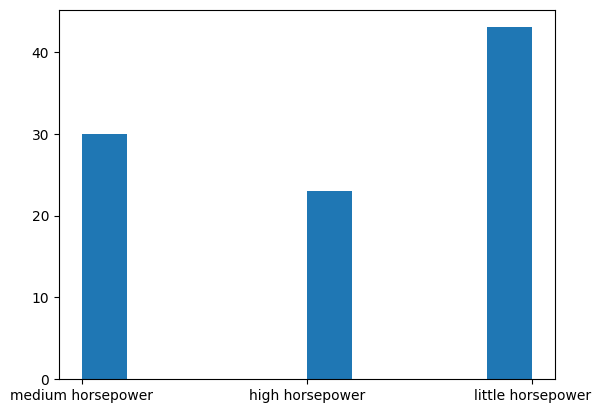

In [515]:
plt.hist(df['binned horsepower'])

<Axes: ylabel='binned horsepower'>

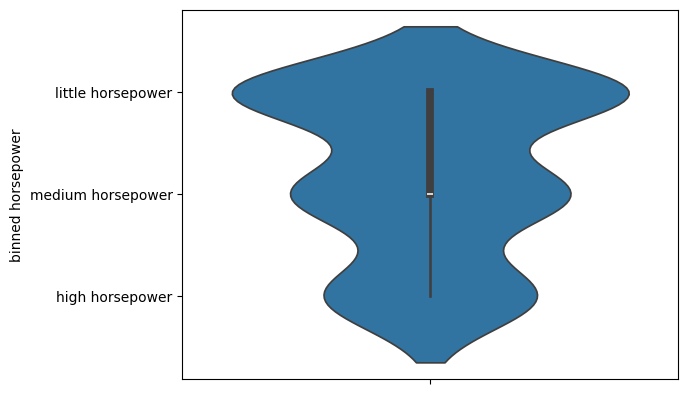

In [516]:
sb.violinplot(df['binned horsepower'])

In [517]:
# Other plots, for fun

{'whiskers': [<matplotlib.lines.Line2D at 0x22c5ed926d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22c5ef8a310>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c5ef6b150>],
 'medians': [<matplotlib.lines.Line2D at 0x22c5ef8b590>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c5ee0a310>],
 'means': []}

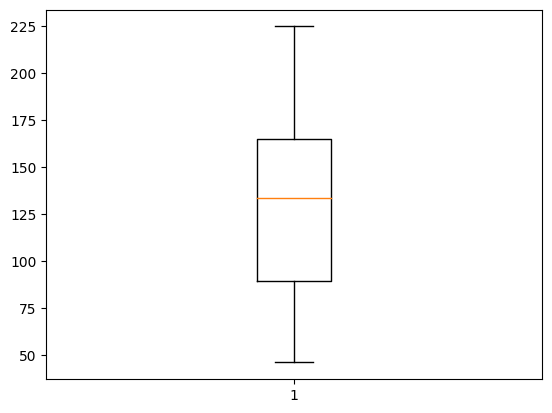

In [518]:
plt.boxplot(df['horsepower'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x22c5efc8d90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x22c5eff2e50>,
 'cmins': <matplotlib.collections.LineCollection at 0x22c5effc510>,
 'cbars': <matplotlib.collections.LineCollection at 0x22c5effd1d0>}

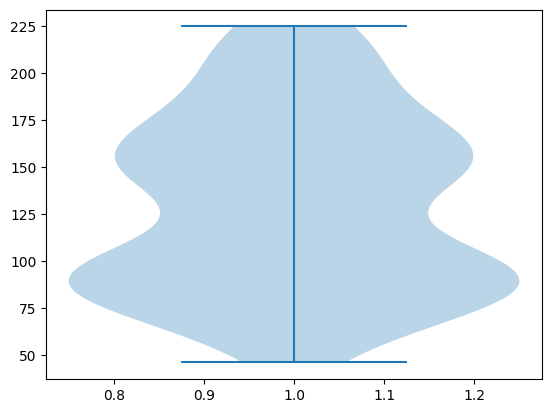

In [519]:
plt.violinplot(df['horsepower'])

### 12. Detect outliers using Z-score and remove them

In [520]:
# Consider a z-score < -3 or > 3 to mean that an entry is an outlier

In [521]:
# Retrieve all column names whose values are numbers
num_cols_names = df.select_dtypes(include=[np.number]).columns

In [522]:
z_score_fn = lambda x: (x-x.mean())/x.std()

In [534]:
z_scores_df = df[num_cols_names].apply(z_score_fn)
z_scores_df

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.227067,0.902514,0.427623,-0.018428,0.167893,-0.693540,-1.232762
1,0.387525,0.902514,0.770619,0.710021,0.360109,-0.860747,-1.232762
2,-0.227067,0.902514,0.515366,0.397828,0.098735,-1.027955,-1.232762
3,0.157053,0.902514,0.403693,0.397828,0.095684,-0.693540,-1.232762
4,-0.046305,0.902514,0.387740,0.189700,0.111957,-1.195162,-1.232762
...,...,...,...,...,...,...,...
91,0.650922,0.902514,0.515366,0.397828,0.913366,0.142496,1.677365
92,0.954841,0.902514,1.488517,1.750661,1.419841,-1.027955,1.677365
93,1.309414,0.902514,1.608167,1.958790,1.639517,-1.027955,1.677365
94,0.954841,0.902514,0.850386,0.918149,0.490287,-1.027955,1.677365


In [535]:
outliers_mask = ((z_scores_df > 3) | (z_scores_df < -3)).any(axis=1)

In [536]:
outliers = df[outliers_mask]

In [537]:
df.drop(index=outliers.index, inplace=True)

### Final: Save the data set

In [538]:
df.to_excel('./auto-mpg-clean.xlsx', index=False)